## 💡 Marketing Ideas (Based on RFM Score)

Segment	Description	Strategy

555	Champions	Loyalty rewards, exclusive offers

111-222	At Risk/Inactive	Win-back campaigns

333-444	Potential loyalists	Targeted promotions

111	Lost customers	Re-engagement or drop campaigns

📂 Step 1: Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


🧹 Step 2: load data


In [2]:
# Load dataset (assumes dataset is in the same directory)
df = pd.read_excel("Online__Retail.xlsx")

# Preview
print(df.head())
print(df.info())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       -----------

🧹 Step 2: Data Cleaning

In [3]:
# Remove missing Customer IDs and canceled orders
df = df[df['CustomerID'].notnull()]
df = df[df['Quantity'] > 0]

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


📊 Step 3: Create RFM Table

In [5]:
# Step 1: Add 'TotalPrice' column to df (safe and simple)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Step 2: Now do RFM aggregation properly
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'  # Now this column exists
})

# Step 3: Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Step 4: Filter out invalid records
rfm = rfm[rfm['Monetary'] > 0]


NameError: name 'snapshot_date' is not defined

🧮 Step 4: Score RFM Segments

In [8]:
# Score each metric from 1 (lowest) to 5 (highest)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

# Combine into RFM Segment
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# RFM Score as total
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int).sum(axis=1)
# Display the RFM table
print(rfm.head())   
# Display scored RFM data
print(rfm[['Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Segment', 'RFM_Score']].head())



            Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Segment  \
CustomerID                                                                     
12346.0         326          1  77183.60       1       1       5         115   
12347.0           2          7   4310.00       5       5       5         555   
12348.0          75          4   1797.24       2       4       4         244   
12349.0          19          1   1757.55       4       1       4         414   
12350.0         310          1    334.40       1       1       2         112   

            RFM_Score  
CustomerID             
12346.0             7  
12347.0            15  
12348.0            10  
12349.0             9  
12350.0             4  
            Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Segment  \
CustomerID                                                                     
12346.0         326          1  77183.60       1       1       5         115   
12347.0           2          7 

📈 Step 5: Visualization (Bonus)

C:\Users\Manzar\AppData\Local\Temp\ipykernel_7172\1427442232.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_heatmap = rfm.groupby(['R_Score','F_Score']).size().unstack()


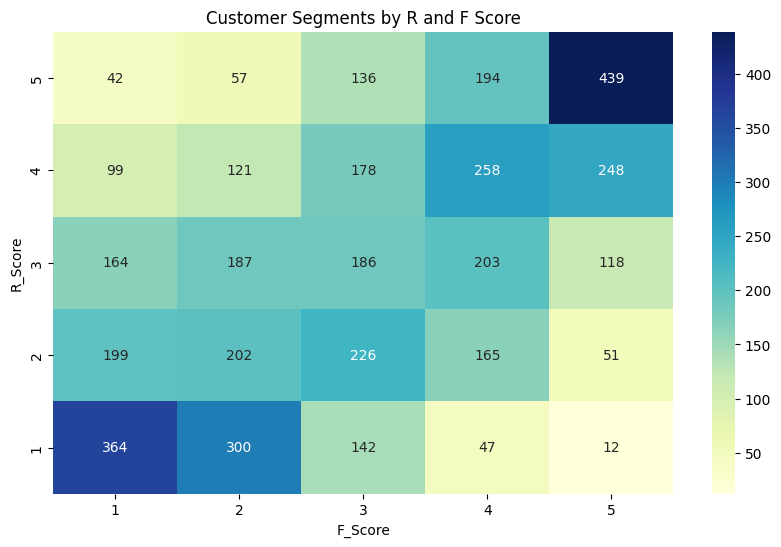

C:\Users\Manzar\AppData\Local\Temp\ipykernel_7172\1427442232.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RFM_Score', data=rfm, palette='Set2')


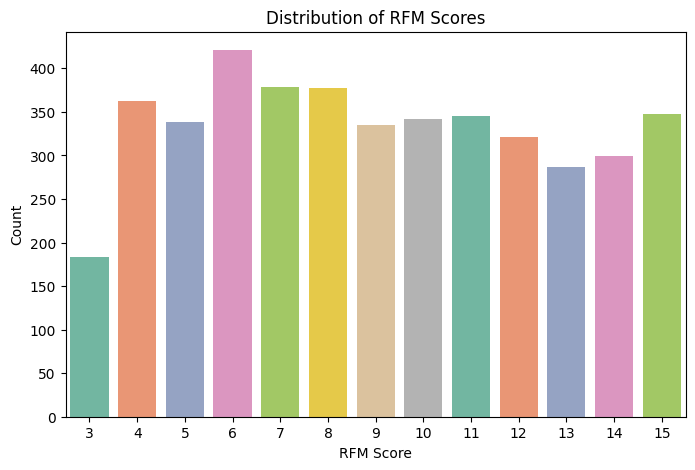

In [9]:
# Heatmap of R and F
rfm_heatmap = rfm.groupby(['R_Score','F_Score']).size().unstack()
plt.figure(figsize=(10,6))
sns.heatmap(rfm_heatmap, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Customer Segments by R and F Score')
plt.show()

# Bar plot for RFM score distribution
plt.figure(figsize=(8,5))
sns.countplot(x='RFM_Score', data=rfm, palette='Set2')
plt.title('Distribution of RFM Scores')
plt.xlabel('RFM Score')
plt.ylabel('Count')
plt.show()


In [7]:
import pandas as pd
import datetime as dt

# -------------------------
# Step 1: Load Dataset
# -------------------------
# Replace with your dataset path
data = pd.read_excel("Online__Retail.xlsx")

# -------------------------
# Step 2: Data Cleaning
# -------------------------
# Remove rows with missing CustomerID
data = data[pd.notnull(data['CustomerID'])]

# Remove cancellations (InvoiceNo starting with 'C')
data = data[~data['InvoiceNo'].astype(str).str.startswith('C')]

# Create Total Price column
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# -------------------------
# Step 3: RFM Table
# -------------------------
# Define snapshot date (1 day after last purchase)
snapshot_date = data['InvoiceDate'].max() + dt.timedelta(days=1)

# Aggregate data per customer
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',   # Frequency
    'TotalPrice': 'sum'       # Monetary
})

# Rename columns
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

# -------------------------
# Step 4: Assign RFM Scores
# -------------------------
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])  # Lower recency = higher score
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1,2,3,4,5])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

# Combine into single RFM score
rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

# -------------------------
# Step 5: Define Segments
# -------------------------
def segment_customer(df):
    if df['RFM_Score'] in ['555','554','545','544','455','454']:
        return 'Champions'
    elif df['R_score'] in ['4','5'] and df['F_score'] in ['4','5']:
        return 'Loyal Customers'
    elif df['M_score'] in ['4','5']:
        return 'Big Spenders'
    elif df['R_score'] in ['1','2'] and df['F_score'] in ['3','4','5']:
        return 'At Risk'
    elif df['R_score'] in ['1','2'] and df['F_score'] in ['1','2']:
        return 'Hibernating'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

# -------------------------
# Step 6: Save Results
# -------------------------
rfm.to_csv("RFM_Segmentation.csv")
print("✅ RFM Analysis Completed! Results saved as RFM_Segmentation.csv")
print(rfm.head(10))


✅ RFM Analysis Completed! Results saved as RFM_Segmentation.csv
            Recency  Frequency  Monetary R_score F_score M_score RFM_Score  \
CustomerID                                                                   
12346.0         326          1  77183.60       1       1       5       115   
12347.0           2          7   4310.00       5       5       5       555   
12348.0          75          4   1797.24       2       4       4       244   
12349.0          19          1   1757.55       4       1       4       414   
12350.0         310          1    334.40       1       1       2       112   
12352.0          36          8   2506.04       3       5       5       355   
12353.0         204          1     89.00       1       1       1       111   
12354.0         232          1   1079.40       1       1       4       114   
12355.0         214          1    459.40       1       1       2       112   
12356.0          23          3   2811.43       4       3       5       435   


In [ ]:
# -------------------------
# Step 7: Marketing Suggestions
# -------------------------
marketing_strategies = {
    'Champions': 'Offer exclusive rewards, early access to sales, loyalty discounts.',
    'Loyal Customers': 'Provide special coupons, referral programs, VIP treatment.',
    'Big Spenders': 'Upsell premium products, invite to special events.',
    'At Risk': 'Send re-engagement emails, limited-time offers to win them back.',
    'Hibernating': 'Reactivate with win-back campaigns, big discounts.',
    'Others': 'General promotions, newsletters to build interest.'
}

rfm['Marketing_Strategy'] = rfm['Segment'].map(marketing_strategies)

# Save final output
rfm.to_csv("RFM_Segmentation_with_Strategies.csv")
print("✅ RFM Analysis + Marketing Suggestions completed!")
print(rfm[['Recency','Frequency','Monetary','Segment','Marketing_Strategy']].head(10))
